In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

In [2]:
data = pd.read_csv('gd_data.csv', header=None)
X = np.array(data.iloc[:,:2])
y = np.array(data.iloc[:,-1])

In [3]:
(X.shape, y.shape)

((100, 2), (100,))

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

In [6]:
def error_formula(y, output):
    return -y * np.log10(output) - (1 - y) * np.log10(1-output)

In [7]:
def update_weights(x, y, weights, bias, learnrate):
    weights = weights - learnrate * ((-1) * (y - output_formula(x, weights, bias)) * x)
    bias = bias - learnrate * ((-1) * (y - output_formula(x, weights, bias)))
    return weights, bias

In [8]:
epochs = 500
learnrate = 0.1

def train(features, targets, epochs, learnrate):
    
    errors = []
    _, n_features = features.shape
    weights = np.random.normal(size=n_features)
    bias = 0

    for e in range(epochs):
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n================ Epoch", e,"================")
            print("Train loss: ", loss)
            
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
            

    # Error plot
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


================ Epoch 0 ================
Train loss:  0.35883771924450236
Accuracy:  0.5

================ Epoch 50 ================
Train loss:  0.08332156732952552
Accuracy:  0.93

================ Epoch 100 ================
Train loss:  0.06999659466044181
Accuracy:  0.93

================ Epoch 150 ================
Train loss:  0.06559832361824823
Accuracy:  0.94

================ Epoch 200 ================
Train loss:  0.06349708257673296
Accuracy:  0.94

================ Epoch 250 ================
Train loss:  0.06231032814556954
Accuracy:  0.94

================ Epoch 300 ================
Train loss:  0.06157235240023306
Accuracy:  0.94

================ Epoch 350 ================
Train loss:  0.06108391979300579
Accuracy:  0.94

================ Epoch 400 ================
Train loss:  0.06074627176691794
Accuracy:  0.94

================ Epoch 450 ================
Train loss:  0.0605052768239939
Accuracy:  0.94


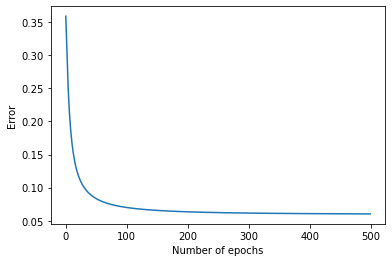

In [9]:
train(X, y, epochs, learnrate)